In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

### Se importan los datos

(60000, 28, 28) (60000,)


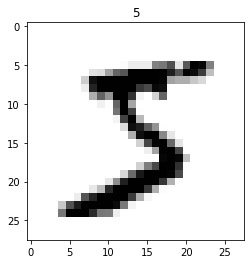

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Imprime los tamanios de la matriz, y_train.shape() devuelve una sola componente pues son los resultados. 
print(X_train.shape, y_train.shape)
plt.title(y_train[0])
plt.imshow(X_train[0], cmap= 'binary')

### Preprocesamiento de datos 

In [3]:
#Se normalizan las imagenes RBG diviendo entre 255
X_train = X_train.astype(np.float32)/255 
X_test = X_test.astype(np.float32)/255 

#Se expande la dimension de las matrices para que el algoritmo pueda trabajar con ellas
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
#Se convierten los vectores de resultados a matrices categoricas
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### Modelo

In [6]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape= (28,28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [8]:
hist = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 41s 87ms/step - loss: 2.2732 - accuracy: 0.1542 - val_loss: 2.2313 - val_accuracy: 0.2449
Epoch 2/10
469/469 [==============================] - 42s 88ms/step - loss: 2.2065 - accuracy: 0.2667 - val_loss: 2.1499 - val_accuracy: 0.4155
Epoch 3/10
469/469 [==============================] - 42s 89ms/step - loss: 2.1191 - accuracy: 0.3819 - val_loss: 2.0386 - val_accuracy: 0.5901
Epoch 4/10
469/469 [==============================] - 42s 91ms/step - loss: 1.9980 - accuracy: 0.4902 - val_loss: 1.8836 - val_accuracy: 0.6840
Epoch 5/10
469/469 [==============================] - 44s 93ms/step - loss: 1.8361 - accuracy: 0.5687 - val_loss: 1.6787 - val_accuracy: 0.7341
Epoch 6/10
469/469 [==============================] - 44s 95ms/step - loss: 1.6337 - accuracy: 0.6235 - val_loss: 1.4372 - val_accuracy: 0.7633
Epoch 7/10
469/469 [==============================] - 44s 93ms/step - loss: 1.4183 - accuracy: 0.6616 - val_loss: 1.1972 - val_accuracy: